# Example notebook using Qililab

In [1]:
import os
from pathlib import Path

from qibo.core.circuit import Circuit
from qibo.gates import M, X
from qiboconnection.api import API

from qililab import Experiment, ExperimentOptions, ExperimentSettings, build_platform
from qililab.typings.enums import Parameter
from qililab.typings.loop import LoopOptions
from qililab.utils.loop import Loop

%matplotlib widget

[Qibo 0.1.7|INFO|2022-12-07 16:17:56]: Using numpy backend on /CPU:0
[Qibo 0.1.7|WARNING|2022-12-07 16:17:56]: numpy backend uses `np.einsum` and supports CPU only. Consider installing the qibojit or qibotf backends for increased performance and to enable GPU acceleration.


In [2]:
fname = os.path.abspath("")
os.environ["RUNCARDS"] = str(Path(fname) / "runcards")
os.environ["DATA"] = str(Path(fname) / "data")

## Set the Remote Connection for Live Plotting

In [3]:
connection = API()

## Load a platform

In [5]:
runcard_name = "sauron_soprano"
platform = build_platform(name=runcard_name)

[qililab] [0.9.2|INFO|2022-12-07 16:21:26]: Building platform
INFO:qililab.config.config:Building platform


### Platform Chip

In [6]:
print(platform.chip)

Chip None with 1 qubits and 2 ports: 

 * Port 0: ----|qubit|----
 * Port 1: ----|resonator|----



### Platform Buses

In [7]:
print(platform.schema)

Bus 0 (time_domain control):  -----|QCM|--|rs_2|------|qubit|----
Bus 1 (time_domain readout):  -----|rs_1|--|QRM|------|resonator|----


## Connect to a Platform

- Connects to all instruments specified in the loaded platform
- Performs the initial setup for each instrument
- Turn on the instruments (by default is False, as it expects instruments to be turned on)

In [ ]:
platform.connect_and_set_initial_setup(automatic_turn_on_instruments=True)

## Create an experiment

### Create the circuit associated with the experiment

In [8]:
# Define Circuit to execute
circuit = Circuit(1)
circuit.add(X(0))
circuit.add(M(0))

### create experiment settings

In [13]:
lo_freq_loop = Loop(
    alias="drive_line_bus",
    parameter=Parameter.LO_FREQUENCY,
    options=LoopOptions(start=6.0e09, stop=6.5e09, num=10),
)

In [14]:
settings = ExperimentSettings(
    hardware_average=1000,
    repetition_duration=200_000,
    software_average=1,
)

options = ExperimentOptions(
    loops=[lo_freq_loop],  # loops to run the experiment
    settings=settings,  # experiment settings
    connection=connection,  # remote connection for live plotting
    device_id=9,  # device identifier to block and release for remote executions
    name="experiment_name",  # name of the experiment (it will be also used for the results folder name)
    plot_y_label=None,  # plot y-axis label
    remote_device_manual_override=False,  # whether to block the remote device manually
)

sample_experiment = Experiment(
    platform=platform,  # platform to run the experiment
    circuits=[circuit],  # circuits to run the experiment
    options=options,  # experiment options
)

### Draw pulses to be sent

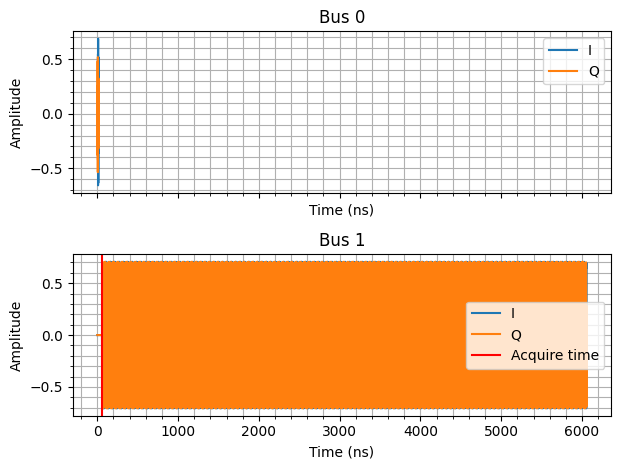

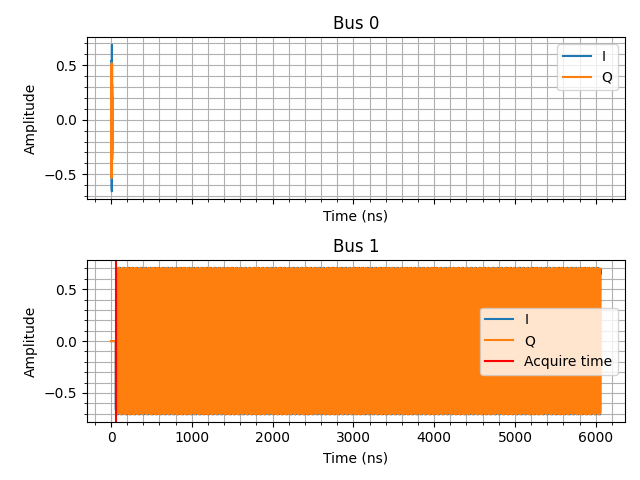

In [10]:
sample_experiment.draw()

## Prepare the execution

In [ ]:
sample_experiment.prepare_execution_and_load_schedule()

## Run the experiment

In [ ]:
results = sample_experiment.execute()

In [ ]:
print(results)

## Disconnect from a Platform

- Disconnect all instruments specified in the loaded platform
- Turns off the instruments only when explicitly specified (by default is set to False)

In [ ]:
platform.disconnect(automatic_turn_off_instruments=True)